In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/kko1/.pyenv/versions/3.8.19/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/kko1/.pyen

Running scvelo 0.3.2 (python 3.8.19) on 2025-04-23 04:55.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


scanpy==1.9.8 anndata==0.9.2 umap==0.5.6 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.13


In [3]:
import os
os.chdir('/mnt/d/KP/EKP_RKP')

In [4]:
import scanpy.external as sce

In [14]:
adata_imn = sc.read('Immune_cell_after_harmony_04-22-24.h5ad')

In [17]:
adata_epi = sc.read('Epi_after_harmony_more_genes_04-30-24.h5ad')

In [9]:
adata_imn.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,type,leiden,batch,tissue_1,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt,n_counts,celltype
AAACCCACAACACACT-1-0,1224,1220,1482.800415,3.906282,0.263440,allograft,EKP,0,0,Immune,23.835543,1.607468,0.628129,0.042361,0.002634,1482.800415,M2_Macrophage
AAACCCACAGACTCTA-1-0,1280,1278,1615.358765,12.976051,0.803292,allograft,EKP,0,0,Immune,71.692551,4.438181,0.000000,0.000000,0.008033,1615.358765,M2_Macrophage
AAACGAACACAACGTT-1-0,1853,1852,1831.287720,20.704004,1.130571,allograft,EKP,2,0,Immune,73.607811,4.019456,2.079207,0.113538,0.011306,1831.287720,Macrophage
AAACGAACAGACGATG-1-0,1839,1838,1929.874512,0.728869,0.037768,allograft,EKP,1,0,Immune,74.001747,3.834537,0.000000,0.000000,0.000378,1929.874512,M1_Macrophage
AAACGAAGTTTGGGTT-1-0,1438,1437,1834.701172,11.139084,0.607133,allograft,EKP,0,0,Immune,104.808022,5.712539,0.000000,0.000000,0.006071,1834.701172,M2_Macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGATCGGTG-1-1,2571,2569,2239.192627,22.420515,1.001277,allograft,RKP,1,1,Immune,137.132645,6.124200,1.049196,0.046856,0.010013,2239.192627,M1_Macrophage
TTTGACTGTTGTGGAG-1-1,1243,1243,1468.334351,26.262447,1.788588,allograft,RKP,1,1,Immune,57.621696,3.924290,0.733939,0.049984,0.017886,1468.334351,M1_Macrophage
TTTGATCGTGCGTGCT-1-1,1629,1628,1980.749756,13.624981,0.687870,allograft,RKP,8,1,Immune,92.942139,4.692271,1.662777,0.083947,0.006879,1980.749756,Macrophage
TTTGGAGTCTATCCAT-1-1,2961,2959,2421.421875,15.085918,0.623019,allograft,RKP,1,1,Immune,150.707428,6.223923,1.764712,0.072879,0.006230,2421.421875,M1_Macrophage


In [16]:
adata_epi.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rpl,pct_counts_rpl,total_counts_rps,pct_counts_rps,tissue_1,celltype
AAACCCACAGTATGAA,0,-1-0,allograft,EKP,0,3835,3835,16059.0,1046.0,6.513482,0.0,0.0,0.0,0.0,epi,epithelial cell
AAACGAAAGTAGGGTC,0,-1-0,allograft,EKP,2,338,338,1239.0,1.0,0.080710,0.0,0.0,0.0,0.0,epi,epithelial cell
AAACGAATCTCGCTTG,0,-1-0,allograft,EKP,2,656,656,1903.0,570.0,29.952705,0.0,0.0,0.0,0.0,epi,epithelial cell
AAACGCTAGTGGCGAT,0,-1-0,allograft,EKP,0,4898,4898,26809.0,977.0,3.644298,0.0,0.0,0.0,0.0,epi,epithelial cell
AAACGCTCATGGAATA,0,-1-0,allograft,EKP,0,4000,4000,21023.0,548.0,2.606669,0.0,0.0,0.0,0.0,epi,epithelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATGACTTG,1,-1-1,allograft,RKP,2,694,694,1473.0,2.0,0.135777,0.0,0.0,0.0,0.0,epi,epithelial cell
TTTGGAGGTCTCGCGA,1,-1-1,allograft,RKP,2,1346,1346,4412.0,80.0,1.813237,0.0,0.0,0.0,0.0,epi,epithelial cell
TTTGGAGTCATGGTAC,1,-1-1,allograft,RKP,2,294,294,625.0,7.0,1.120000,0.0,0.0,0.0,0.0,epi,epithelial cell
TTTGTTGCAACAGCCC,1,-1-1,allograft,RKP,1,236,236,940.0,617.0,65.638298,0.0,0.0,0.0,0.0,epi,epithelial cell


In [15]:
adata_epi.obs['tissue_1'] = "epi"
adata_epi.obs['celltype'] = "epithelial cell"

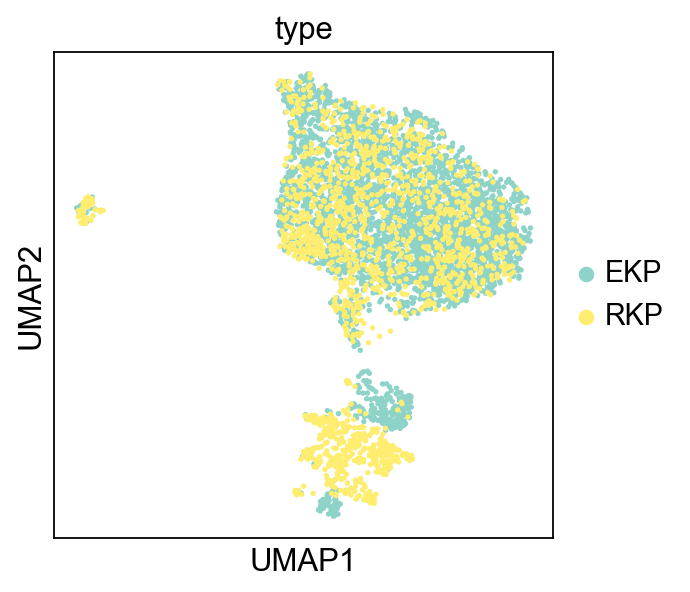

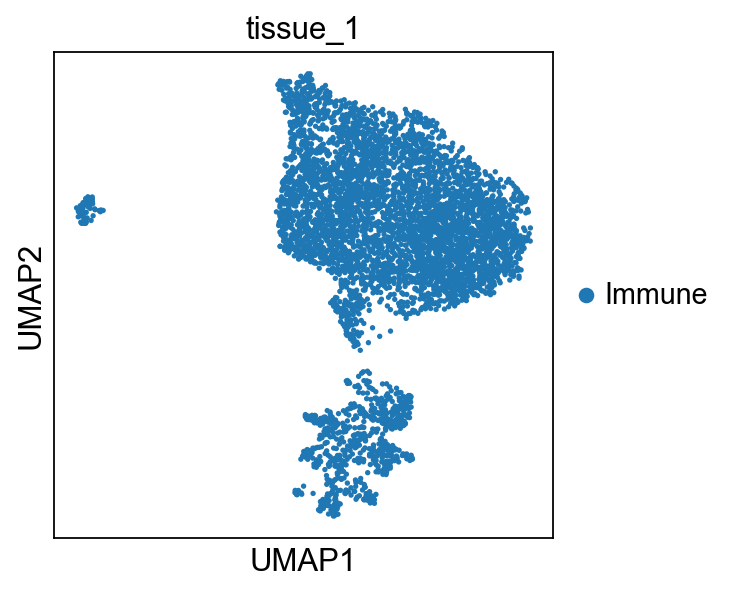

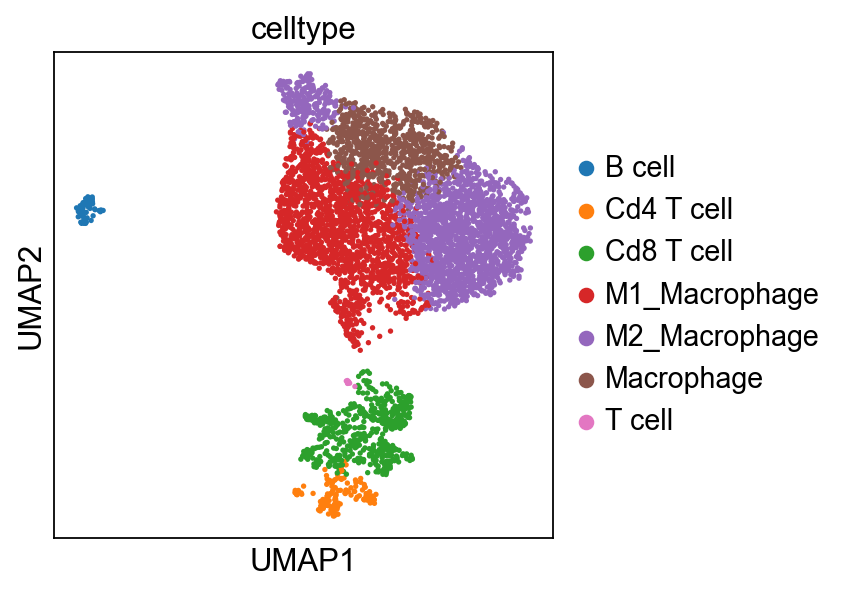

In [13]:
sc.pl.umap(adata_imn, color=['type'])
sc.pl.umap(adata_imn, color=['tissue_1'])
sc.pl.umap(adata_imn, color=['celltype'])

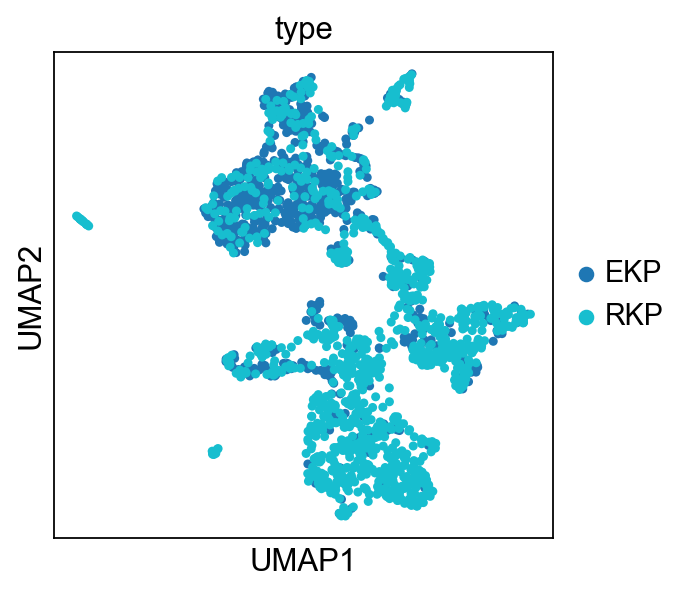

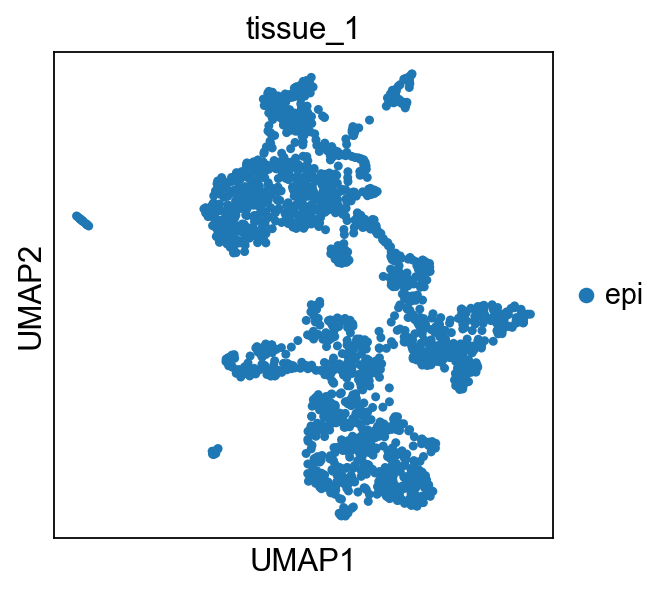

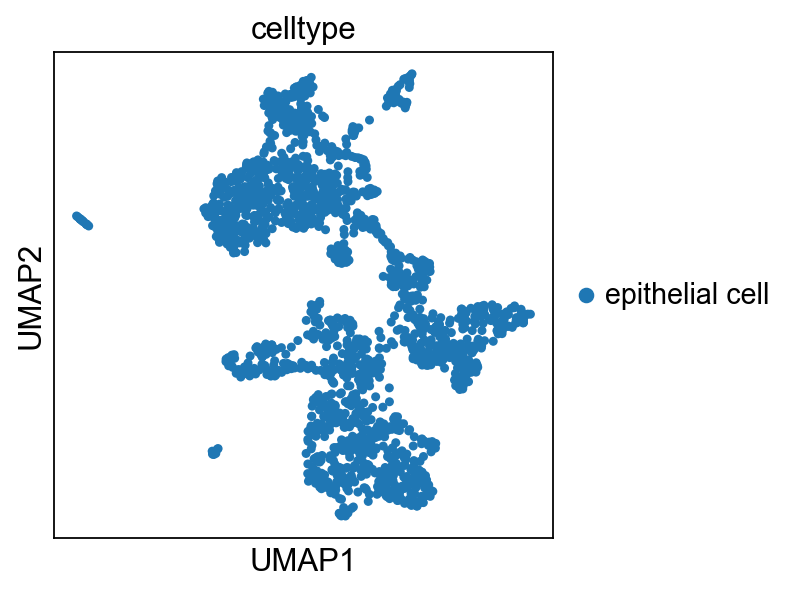

In [17]:
sc.pl.umap(adata_epi, color=['type'])
sc.pl.umap(adata_epi, color=['tissue_1'])
sc.pl.umap(adata_epi, color=['celltype'])

In [22]:
adata_ekp_epi = adata_epi[adata_epi.obs['type']=="EKP"]
adata_rkp_epi = adata_epi[adata_epi.obs['type']=="RKP"]
adata_ekp_imn = adata_imn[adata_imn.obs['type']=="EKP"]
adata_rkp_imn = adata_imn[adata_imn.obs['type']=="RKP"]

In [23]:
adata_ekp = adata_ekp_epi.concatenate(adata_ekp_imn)
adata_rkp = adata_rkp_epi.concatenate(adata_rkp_imn)

In [24]:
adata_ekp.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,total_counts_rps,pct_counts_rps,tissue_1,celltype,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt,n_counts
AAACCCACAGTATGAA-0,0,-1-0,allograft,EKP,0,3835,3835,16059.000000,1046.000000,6.513482,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAAAGTAGGGTC-0,0,-1-0,allograft,EKP,2,338,338,1239.000000,1.000000,0.080710,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAATCTCGCTTG-0,0,-1-0,allograft,EKP,2,656,656,1903.000000,570.000000,29.952705,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTAGTGGCGAT-0,0,-1-0,allograft,EKP,0,4898,4898,26809.000000,977.000000,3.644298,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTCATGGAATA-0,0,-1-0,allograft,EKP,0,4000,4000,21023.000000,548.000000,2.606669,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGGTCTCG-1-0-1,1,NaN,allograft,EKP,4,660,660,1240.447876,0.000000,0.000000,...,NaN,NaN,Immune,Cd8 T cell,92.481125,7.455462,0.000000,0.000000,0.000000,1240.447876
TTTGGTTCATGACTCA-1-0-1,1,NaN,allograft,EKP,8,1452,1452,1508.370605,2.504030,0.166009,...,NaN,NaN,Immune,Macrophage,35.612019,2.360960,2.290069,0.151824,0.001660,1508.370605
TTTGTTGAGGGCGAAG-1-0-1,1,NaN,allograft,EKP,3,1517,1515,1791.687134,7.849820,0.438124,...,NaN,NaN,Immune,M1_Macrophage,79.803886,4.454120,0.000000,0.000000,0.004381,1791.687134
TTTGTTGCATGACTTG-1-0-1,1,NaN,allograft,EKP,0,1110,1108,1595.297119,5.200015,0.325959,...,NaN,NaN,Immune,M2_Macrophage,79.109062,4.958892,2.099272,0.131591,0.003260,1595.297119


In [25]:
adata_rkp.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,total_counts_rps,pct_counts_rps,tissue_1,celltype,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt,n_counts
AAACCCAGTCACAGAG-0,0,-1-1,allograft,RKP,0,4410,4410,16214.000000,1912.000000,11.792278,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAAGTAGTCGGA-0,0,-1-1,allograft,RKP,1,1078,1078,6911.000000,269.000000,3.892345,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAAGTTGGGAAC-0,0,-1-1,allograft,RKP,1,1155,1155,6179.000000,1907.000000,30.862600,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAATCCACTGAA-0,0,-1-1,allograft,RKP,2,644,644,1532.000000,0.000000,0.000000,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTGTAGTTCCA-0,0,-1-1,allograft,RKP,1,2280,2280,24263.000000,1525.000000,6.285290,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGATCGGTG-1-1-1,1,NaN,allograft,RKP,1,2571,2569,2239.192627,22.420515,1.001277,...,NaN,NaN,Immune,M1_Macrophage,137.132645,6.124200,1.049196,0.046856,0.010013,2239.192627
TTTGACTGTTGTGGAG-1-1-1,1,NaN,allograft,RKP,1,1243,1243,1468.334351,26.262447,1.788588,...,NaN,NaN,Immune,M1_Macrophage,57.621696,3.924290,0.733939,0.049984,0.017886,1468.334351
TTTGATCGTGCGTGCT-1-1-1,1,NaN,allograft,RKP,8,1629,1628,1980.749756,13.624981,0.687870,...,NaN,NaN,Immune,Macrophage,92.942139,4.692271,1.662777,0.083947,0.006879,1980.749756
TTTGGAGTCTATCCAT-1-1-1,1,NaN,allograft,RKP,1,2961,2959,2421.421875,15.085918,0.623019,...,NaN,NaN,Immune,M1_Macrophage,150.707428,6.223923,1.764712,0.072879,0.006230,2421.421875


In [26]:
adata_ekp.write('EKP_epithelial_immune.h5ad', compression='gzip')
adata_rkp.write('RKP_epithelial_immune.h5ad', compression='gzip')

In [5]:
adata_ekp = sc.read('EKP_epithelial_immune.h5ad')
adata_ekp

AnnData object with n_obs × n_vars = 4198 × 16333
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'tissue_1', 'celltype', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts'
    var: 'mt', 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'rpl-0', 'rps-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'mean-0', 'std-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'mean-1', 'std-1', 'gene_ids_2-1', 'feature_types_2-1', 'mt_2-1', 'n_cells_2-0-1', 'n_cells_by_counts_2-0-1', 'mean_counts_2-0-1', 'pct_dropout_by_counts_2-0-1', 'total_counts_2-0-1', 'n_cells_2-1-1', 'n_cells_by_counts_2-1-1', 'mean_counts_2-1-1', 'pct_dropout_by_counts_2-1-1', 'total_counts_2-1-1', 'ribo-1', 'hb-1'
    obsm: 'X_pca

In [6]:
adata_rkp = sc.read('RKP_epithelial_immune.h5ad')
adata_rkp

AnnData object with n_obs × n_vars = 2774 × 16333
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'tissue_1', 'celltype', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts'
    var: 'mt', 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'rpl-0', 'rps-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'mean-0', 'std-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'mean-1', 'std-1', 'gene_ids_2-1', 'feature_types_2-1', 'mt_2-1', 'n_cells_2-0-1', 'n_cells_by_counts_2-0-1', 'mean_counts_2-0-1', 'pct_dropout_by_counts_2-0-1', 'total_counts_2-0-1', 'n_cells_2-1-1', 'n_cells_by_counts_2-1-1', 'mean_counts_2-1-1', 'pct_dropout_by_counts_2-1-1', 'total_counts_2-1-1', 'ribo-1', 'hb-1'
    obsm: 'X_pca

In [7]:
adata_all = adata_ekp.concatenate(adata_rkp)
adata_all

AnnData object with n_obs × n_vars = 6972 × 16333
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'tissue_1', 'celltype', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt', 'n_counts'
    var: 'mt', 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'rpl-0', 'rps-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'mean-0', 'std-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'mean-1', 'std-1', 'gene_ids_2-1', 'feature_types_2-1', 'mt_2-1', 'n_cells_2-0-1', 'n_cells_by_counts_2-0-1', 'mean_counts_2-0-1', 'pct_dropout_by_counts_2-0-1', 'total_counts_2-0-1', 'n_cells_2-1-1', 'n_cells_by_counts_2-1-1', 'mean_counts_2-1-1', 'pct_dropout_by_counts_2-1-1', 'total_counts_2-1-1', 'ribo-1', 'hb-1'
    obsm: 'X_pca

In [23]:
adata_all.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,total_counts_rps,pct_counts_rps,tissue_1,celltype,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt,n_counts
AAACCCACAGTATGAA-0-0,0,-1-0,allograft,EKP,0,3835,3835,16059.000000,1046.000000,6.513482,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAAAGTAGGGTC-0-0,0,-1-0,allograft,EKP,2,338,338,1239.000000,1.000000,0.080710,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAATCTCGCTTG-0-0,0,-1-0,allograft,EKP,2,656,656,1903.000000,570.000000,29.952705,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTAGTGGCGAT-0-0,0,-1-0,allograft,EKP,0,4898,4898,26809.000000,977.000000,3.644298,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTCATGGAATA-0-0,0,-1-0,allograft,EKP,0,4000,4000,21023.000000,548.000000,2.606669,...,0.0,0.0,epi,epithelial cell,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGATCGGTG-1-1-1-1,1,NaN,allograft,RKP,1,2571,2569,2239.192627,22.420515,1.001277,...,NaN,NaN,Immune,M1_Macrophage,137.132645,6.124200,1.049196,0.046856,0.010013,2239.192627
TTTGACTGTTGTGGAG-1-1-1-1,1,NaN,allograft,RKP,1,1243,1243,1468.334351,26.262447,1.788588,...,NaN,NaN,Immune,M1_Macrophage,57.621696,3.924290,0.733939,0.049984,0.017886,1468.334351
TTTGATCGTGCGTGCT-1-1-1-1,1,NaN,allograft,RKP,8,1629,1628,1980.749756,13.624981,0.687870,...,NaN,NaN,Immune,Macrophage,92.942139,4.692271,1.662777,0.083947,0.006879,1980.749756
TTTGGAGTCTATCCAT-1-1-1-1,1,NaN,allograft,RKP,1,2961,2959,2421.421875,15.085918,0.623019,...,NaN,NaN,Immune,M1_Macrophage,150.707428,6.223923,1.764712,0.072879,0.006230,2421.421875


In [32]:
df = pd.crosstab(adata_all.obs['type'], adata_all.obs['celltype'])
df.to_csv('celltype_genotype_cell_number.csv')

In [33]:
df

celltype,B cell,Cd4 T cell,Cd8 T cell,M1_Macrophage,M2_Macrophage,Macrophage,T cell,epithelial cell
type,,,,,,,,
EKP,13,63,215,1091,1517,582,0,717
RKP,48,82,331,556,400,234,8,1115


In [19]:
adata_imn.obs['celltype']

AAACCCACAACACACT-1-0    M2_Macrophage
AAACCCACAGACTCTA-1-0    M2_Macrophage
AAACGAACACAACGTT-1-0       Macrophage
AAACGAACAGACGATG-1-0    M1_Macrophage
AAACGAAGTTTGGGTT-1-0    M2_Macrophage
                            ...      
TTTGACTAGATCGGTG-1-1    M1_Macrophage
TTTGACTGTTGTGGAG-1-1    M1_Macrophage
TTTGATCGTGCGTGCT-1-1       Macrophage
TTTGGAGTCTATCCAT-1-1    M1_Macrophage
TTTGTTGGTGAGTTTC-1-1       Cd8 T cell
Name: celltype, Length: 5140, dtype: category
Categories (7, object): ['B cell', 'Cd4 T cell', 'Cd8 T cell', 'M1_Macrophage', 'M2_Macrophage', 'Macrophage', 'T cell']